## matplotlib.pyplot.bar

#### matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)

Make a bar plot.

The bars are positioned at x with the given alignment. Their dimensions are given by width and height. The vertical baseline is bottom (default 0).

Each of x, height, width, and bottom may either be a scalar applying to all bars, or it may be a sequence of length N providing a separate value for each bar.

#### Parameters:	
x : sequence of scalars
The x coordinates of the bars. See also align for the alignment of the bars to the coordinates.

height : scalar or sequence of scalars
The height(s) of the bars.

width : scalar or array-like, optional
The width(s) of the bars (default: 0.8).

bottom : scalar or array-like, optional
The y coordinate(s) of the bars bases (default: 0).

align : {'center', 'edge'}, optional, default: 'center'
Alignment of the bars to the x coordinates:

    1. 'center': Center the base on the x positions.
    2. 'edge': Align the left edges of the bars with the x positions.
``To align the bars on the right edge pass a negative width and align='edge'.``

#### Returns:	
container : BarContainer
Container with all the bars and optionally errorbars.

#### Other Parameters:	
color : scalar or array-like, optional
The colors of the bar faces.

edgecolor : scalar or array-like, optional
The colors of the bar edges.

linewidth : scalar or array-like, optional
Width of the bar edge(s). If 0, don't draw edges.

tick_label : string or array-like, optional
The tick labels of the bars. Default: None (Use default numeric labels.)

xerr, yerr : scalar or array-like of shape(N,) or shape(2,N), optional
If not None, add horizontal / vertical errorbars to the bar tips. The values are +/- sizes relative to the data:

    scalar: symmetric +/- values for all bars
    shape(N,): symmetric +/- values for each bar
    shape(2,N): Separate - and + values for each bar. First row contains the lower errors, the second row contains the upper errors.
    None: No errorbar. (Default)

ecolor : scalar or array-like, optional, default: 'black'
The line color of the errorbars.

capsize : scalar, optional
The length of the error bar caps in points. Default: None, which will take the value from rcParams["errorbar.capsize"].

error_kw : dict, optional
Dictionary of kwargs to be passed to the errorbar method. Values of ecolor or capsize defined here take precedence over the independent kwargs.

log : bool, optional, default: False
If True, set the y-axis to be log scale.

orientation : {'vertical', 'horizontal'}, optional
This is for internal use only. Please use barh for horizontal bar plots. Default: 'vertical'.

#### Stacked Bar Graph

This is an example of creating a stacked bar plot with error bars using bar. Note the parameters yerr used for error bars, and bottom to stack the women's bars on top of the men's bars.

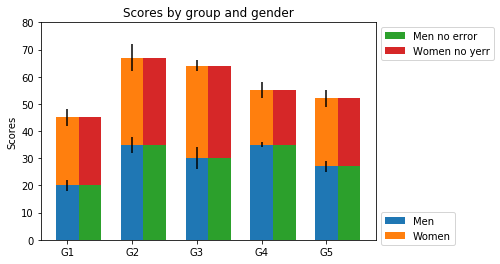

In [33]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width, bottom=menMeans, yerr=womenStd)
p1_noyerr= plt.bar(ind+width, menMeans, width, label='Men no error')
p2_noyerr = plt.bar(ind+width, womenMeans, width, bottom=menMeans,label='Women no yerr')

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
legend = plt.legend((p1[0], p2[0]), ('Men', 'Women'),bbox_to_anchor=[1, 0, 0, 0.15], loc='upper left')
#plt.legend((p1, p2), ('Men', 'Women'))
plt.gcf().add_artist(legend)
plt.legend(bbox_to_anchor=[1, 0, 0.2, 1], loc='upper left')
#plt.legend(bbox_to_anchor=[1, 0, 0.2, 1], loc='upper left')

plt.show()

#### Grouped bar chart with labels

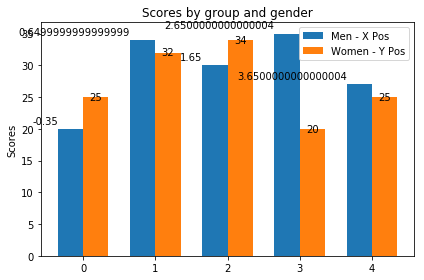

In [67]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men - X Pos') #align to left of the x-ticks
rects2 = ax.bar(x + width/2, women_means, width, label='Women - Y Pos')#align to right of the x-ticks

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()


def autolabely(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -5),  # 5 points vertical down offset from annotaton position
                    textcoords="offset points",
                     ha='center', va='bottom')

def autolabelx(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(rect.get_x()),
                    xy=(rect.get_x() , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                     ha='right', va='bottom')

autolabelx(rects1)
autolabely(rects2)

fig.tight_layout()

plt.show()

#### Custom Ticker1

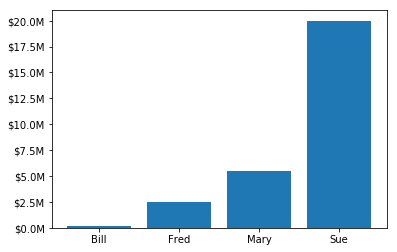

In [19]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]


def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)


formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money)
plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
#ax.set_xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
#plt.xticks(x)
#ax.set_xticks(x)
#ax.set_xticklabels(('Bill', 'Fred', 'Mary', 'Sue'))
plt.show()

#### Stacked bar with Table Demo

Demo of table function to display a table within a plot.

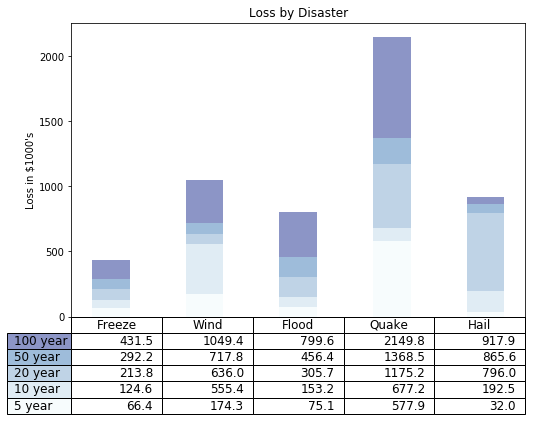

In [40]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
plt.figure(figsize=(9, 6))
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors, 
                      colLabels=columns, 
                      colWidths=[0.2] * len(columns),
                      loc='bottom')
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.scale(1, 1.5)

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

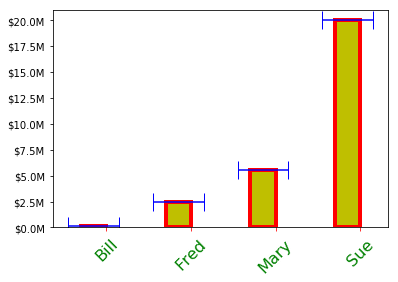

In [67]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]


def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)


formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money, width=-0.3, align='edge', color='y', edgecolor='r', linewidth=4, 
        tick_label=('Bill', 'Fred', 'Mary', 'Sue'),  xerr=0.3, ecolor='b', capsize=9)
#ax.set_xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
#plt.xticks(x)
#ax.set_xticks(x)
#ax.set_xticklabels(('Bill', 'Fred', 'Mary', 'Sue'))

for tick in ax.xaxis.get_major_ticks(): 
    tick.tick1line.set_color('r')
    tick.tick1line.set_markersize(15)
    tick.tick1line.set_markeredgewidth(3)
    tick.label1.set_color('g')
    tick.label1.set_rotation(45)
    tick.label1.set_fontsize(16)
    
ax.tick_params(direction='out', pad=5)    
#plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))    
plt.show()